This notebook aim to make plots from performances

In [1]:
#some libraries

import json
import matplotlib.pyplot as plt
import numpy as np
import re
from UNet_class_and_functions import*

In [2]:
performances_directory = "/home/gabriel/Documents/TR DIMA/data_clean/performances"
N_pt = 18
#opening performances data

file_list = list_directory_contents(performances_directory)

tracked_param = r"param"

param_values_list = []


for name in file_list:
    
    match = re.search(tracked_param+r'='+r'(\d+)', name)


    if match:
        param_value = int(match.group(1))
        print(f"The parameter's value is {param_value}.")
        param_values_list.append(param_value)
    else:
        print("No match found.")

#sorting param list
param_values_list = np.array(param_values_list)
sorter = np.argsort(param_values_list)
param_values_list = np.sort(param_values_list)


mean_errors = np.zeros((len(param_values_list),N_pt))
global_mean_errors = np.zeros((len(param_values_list)))
misclassifications_rates = np.zeros((len(param_values_list),N_pt))
global_misclassification_rate = np.zeros((len(param_values_list)))

for index,name in enumerate(file_list):

    with open(performances_directory + '/' + name) as file:
        current_performances = json.load(file)
        for key in current_performances.keys():
            b0,b1,m_err,mis_r = current_performances[key]
            if key == 'all':
                global_mean_errors[index] = m_err
                global_misclassification_rate[index] = mis_r
            else:
                key = int(key)
                mean_errors[index,key] = m_err
                misclassifications_rates[index,key] = mis_r

#sorting
mean_errors = mean_errors[sorter,:]
global_mean_errors = global_mean_errors[sorter]
misclassifications_rates = misclassifications_rates[sorter,:]
global_misclassification_rate = global_misclassification_rate[sorter]









The parameter's value is 3.
The parameter's value is 8.
The parameter's value is 22.
The parameter's value is 4.
The parameter's value is 6.
The parameter's value is 7.
The parameter's value is 2.
The parameter's value is 5.
The parameter's value is 15.
The parameter's value is 1.
The parameter's value is 12.
The parameter's value is 18.
The parameter's value is 10.


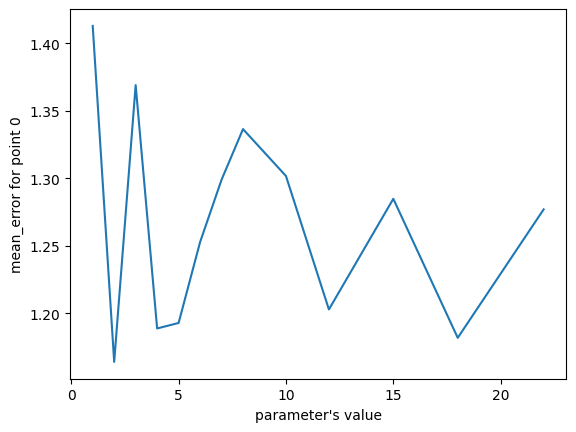

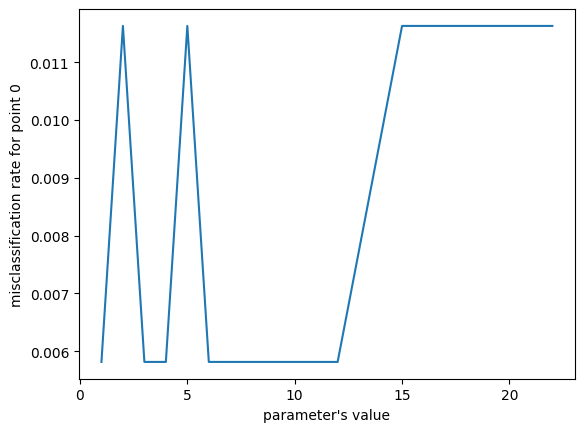

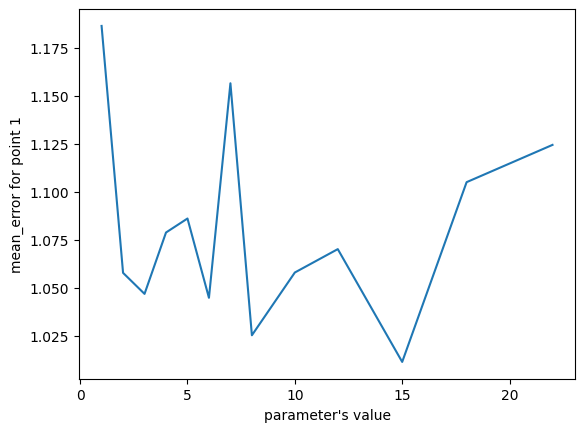

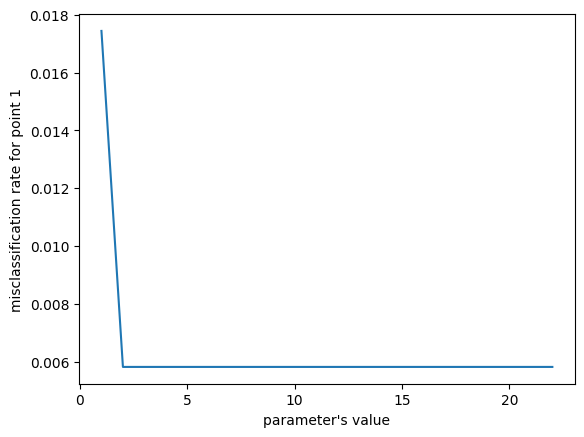

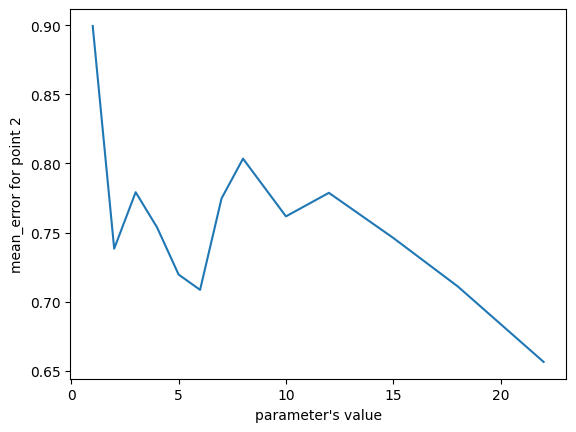

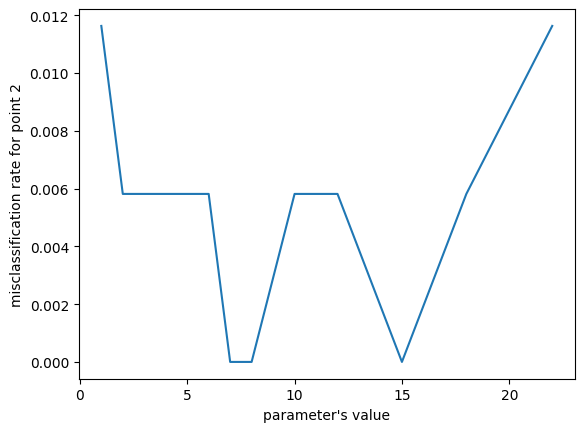

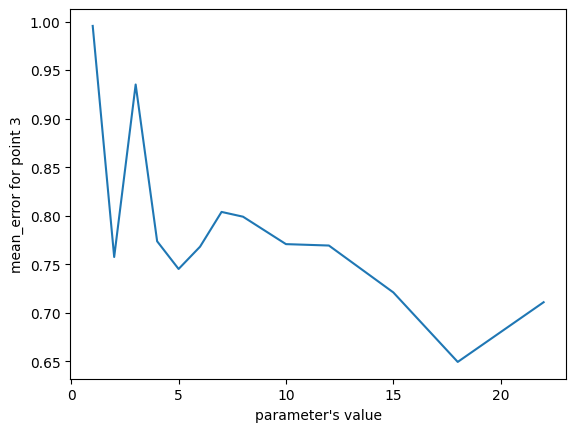

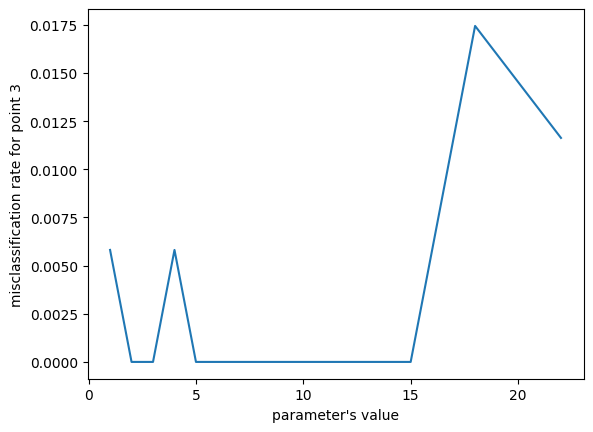

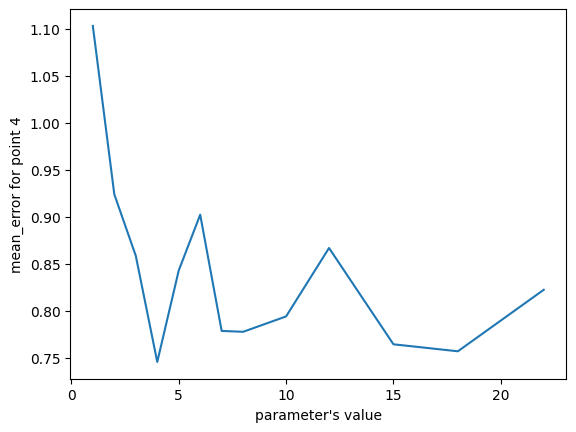

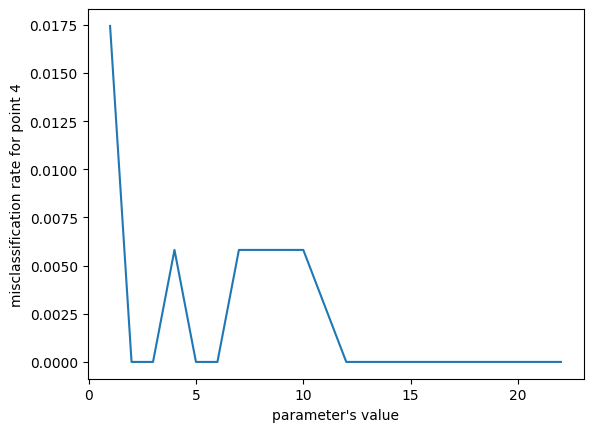

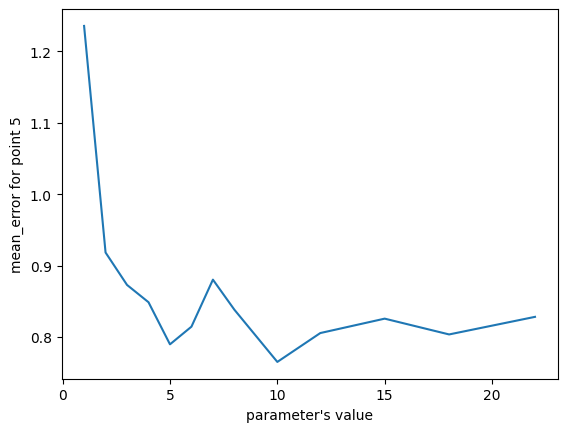

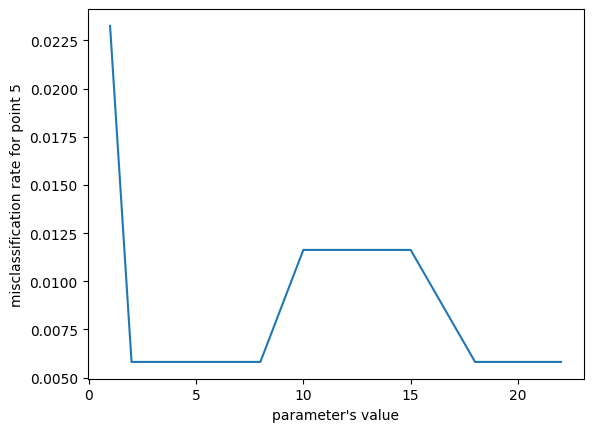

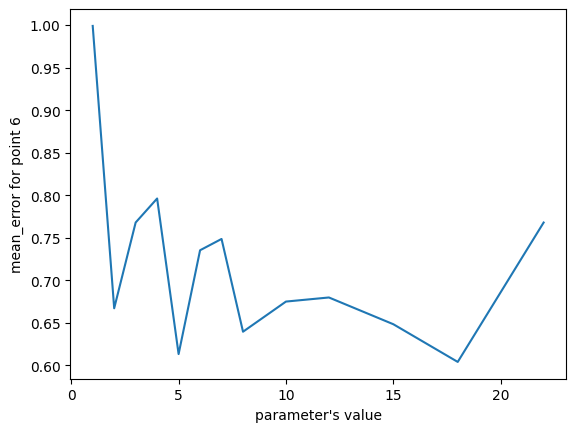

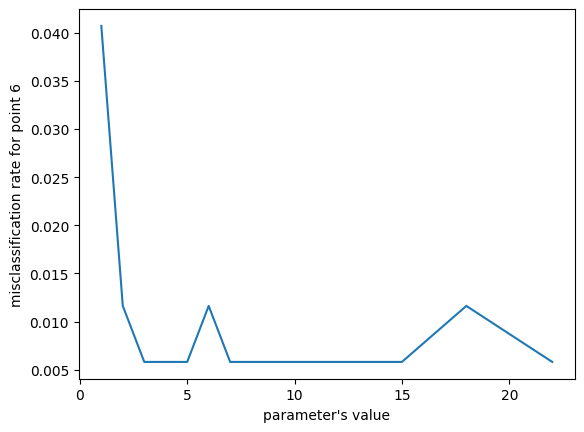

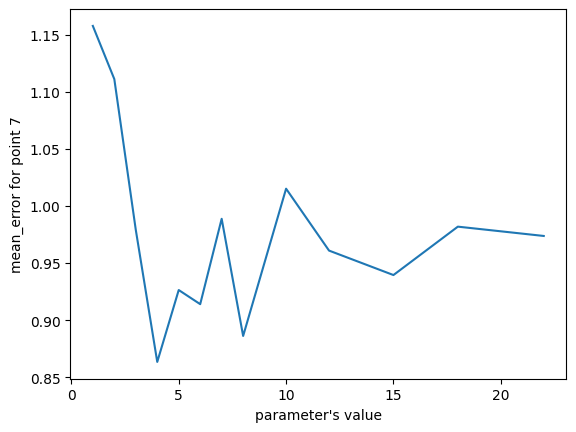

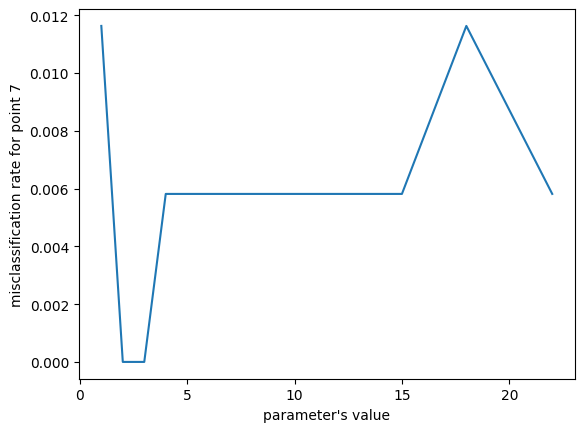

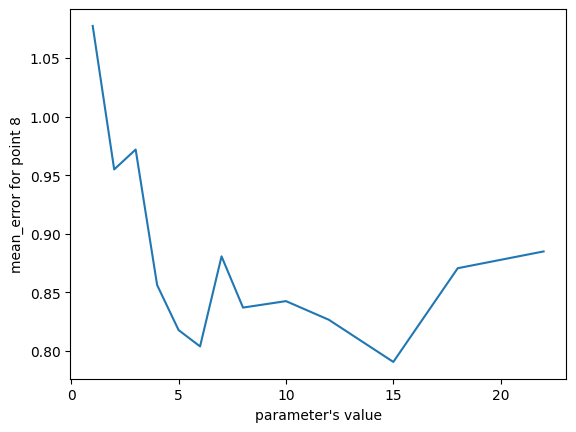

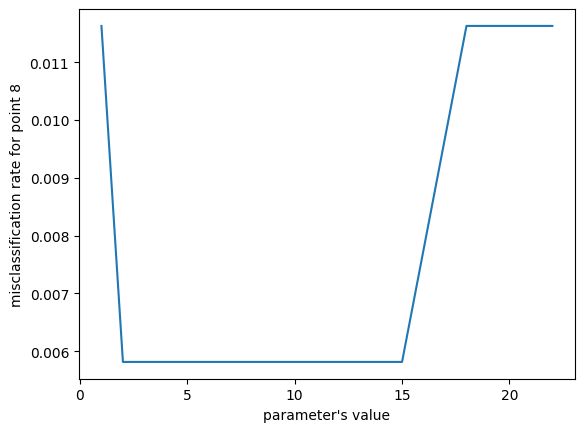

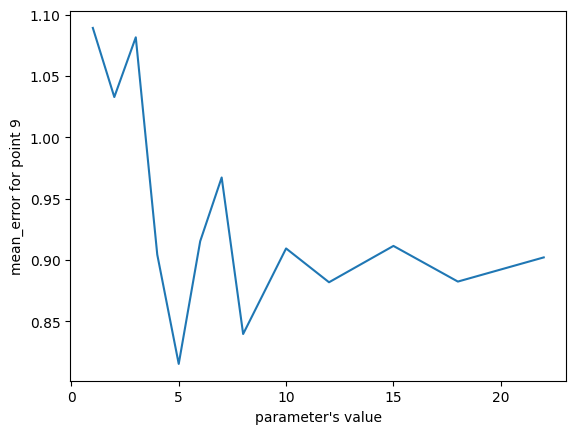

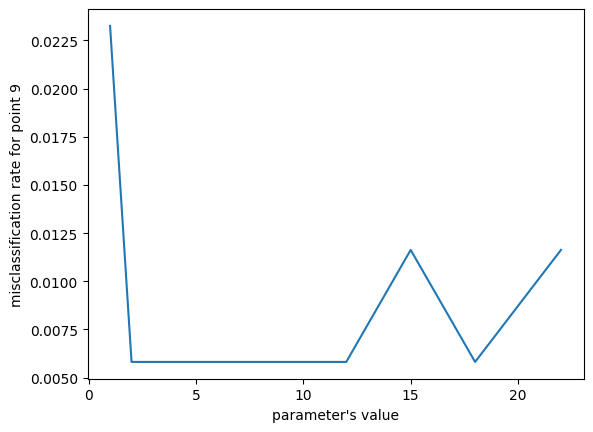

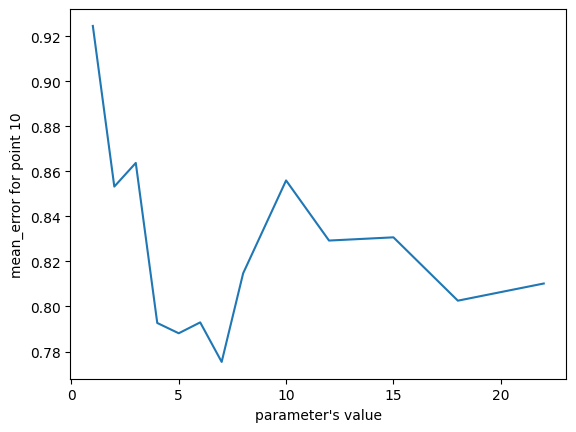

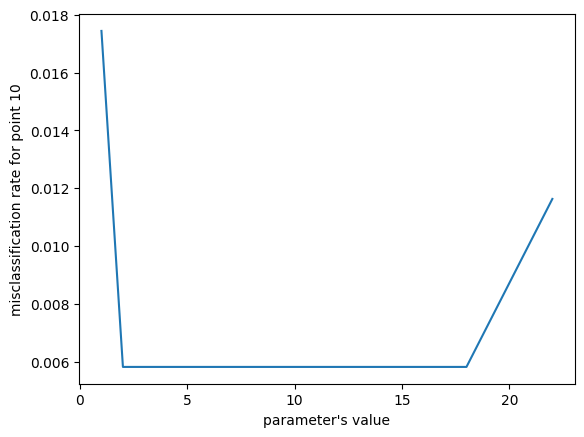

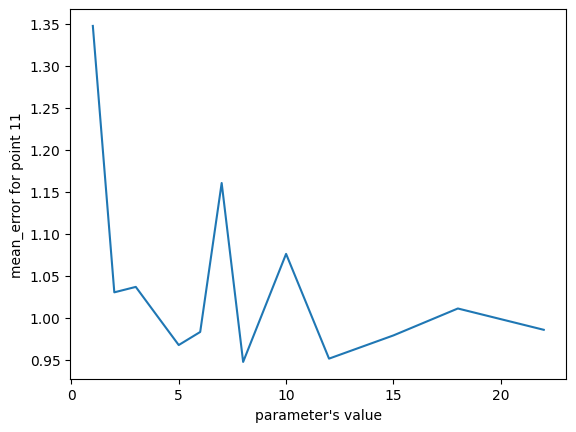

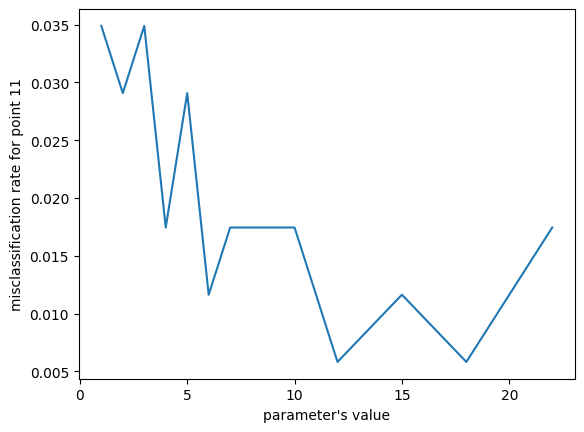

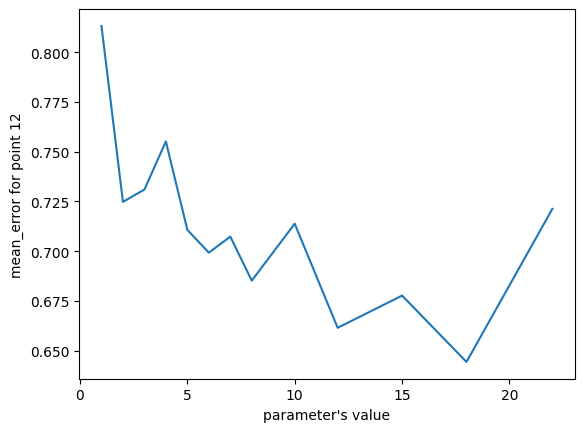

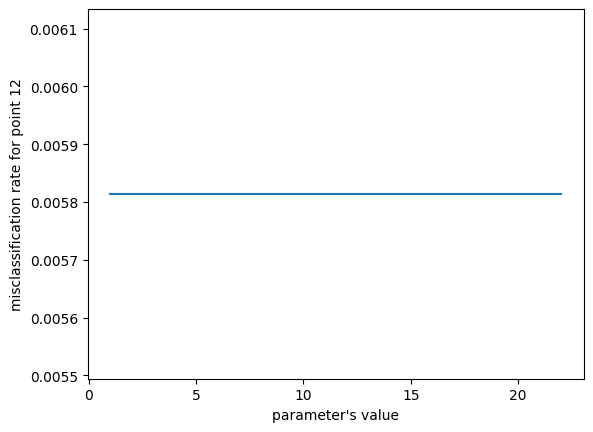

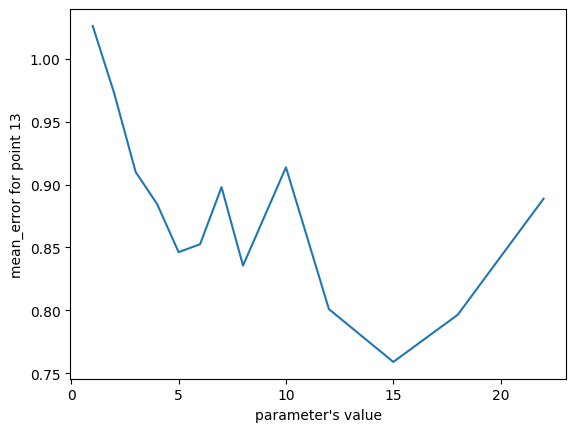

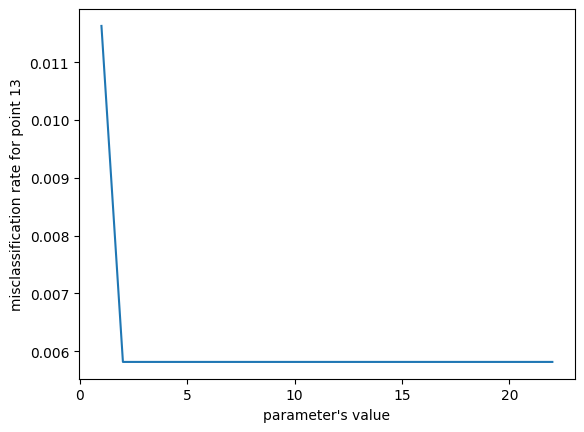

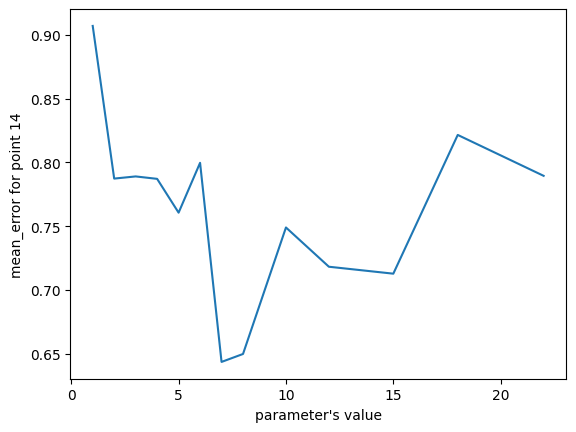

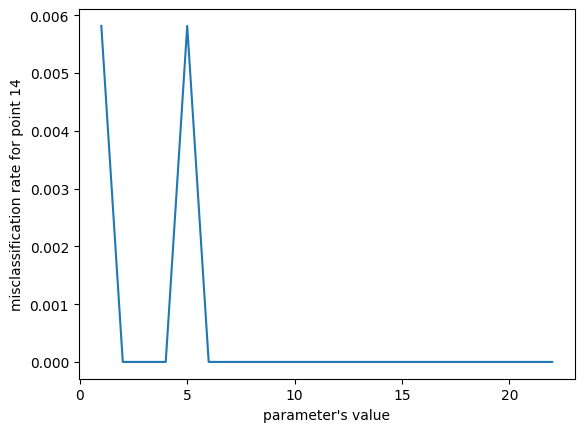

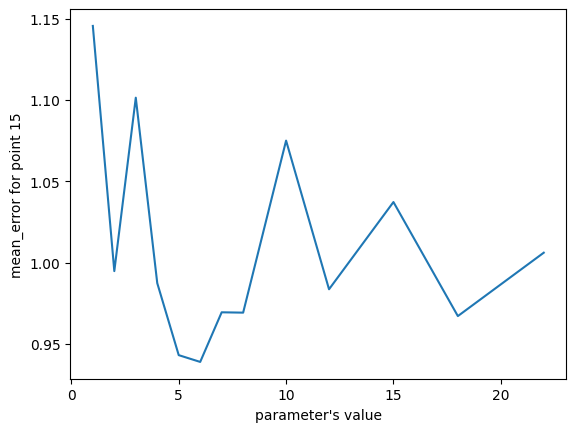

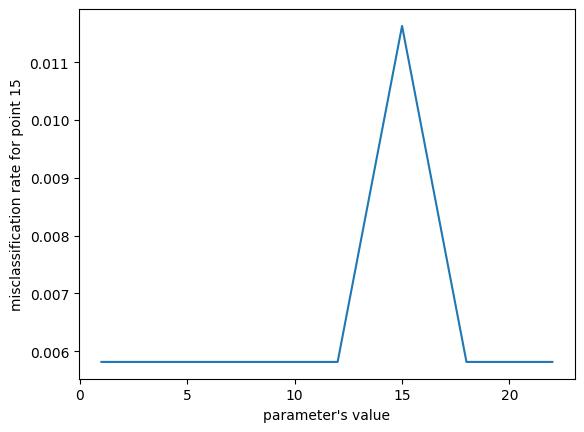

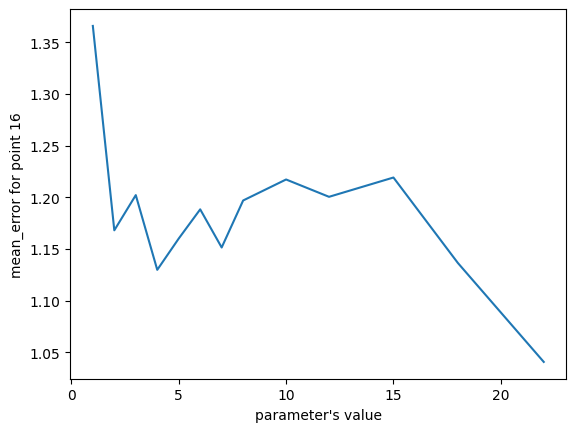

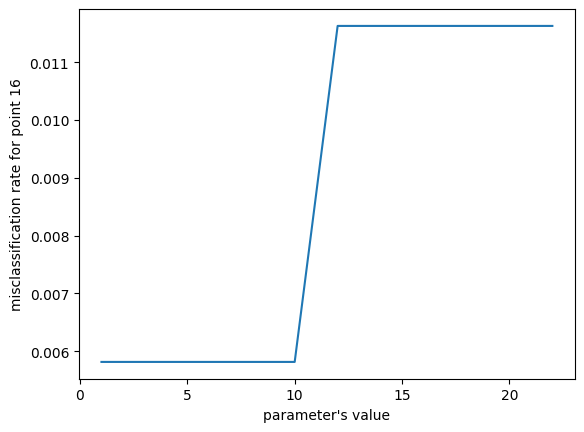

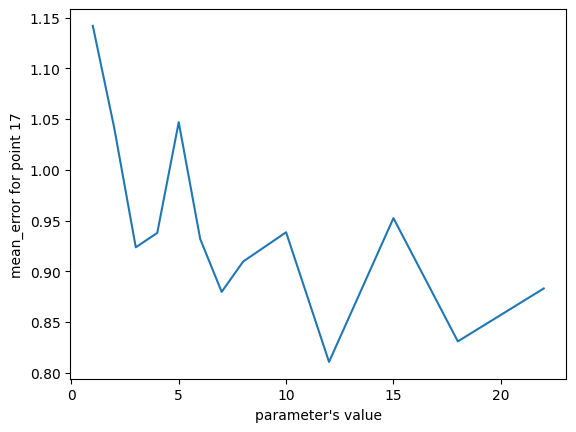

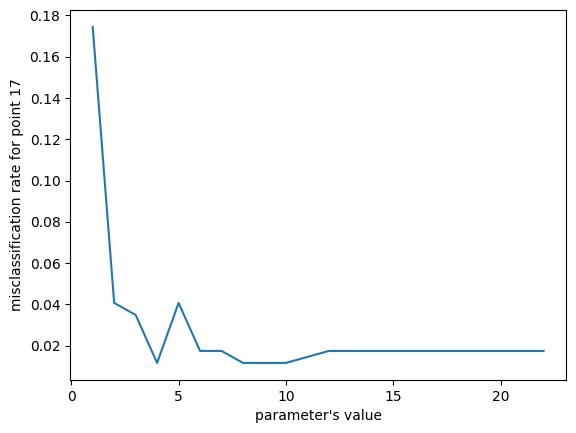

In [3]:
#displaying results for each point

for i in range(N_pt):

    plt.plot(param_values_list,mean_errors[:,i])
    plt.xlabel("parameter's value")
    plt.ylabel(f"mean_error for point {i}")
    plt.show()


    plt.plot(param_values_list,misclassifications_rates[:,i])
    plt.xlabel("parameter's value")
    plt.ylabel(f"misclassification rate for point {i}")    
    plt.show()




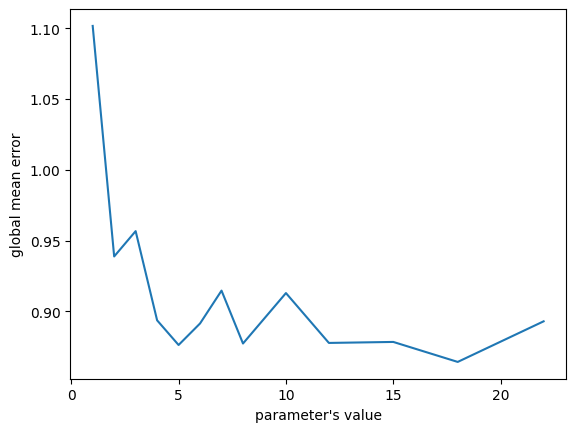

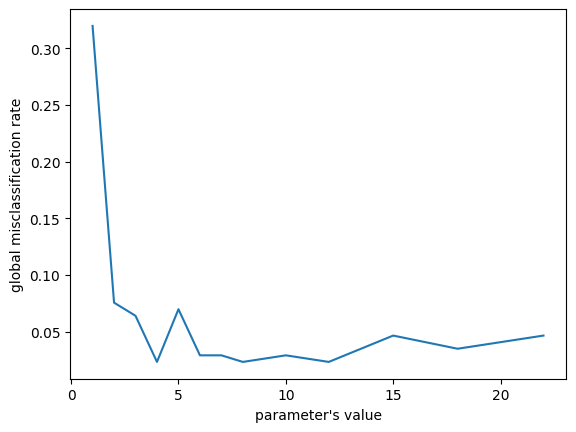

In [ ]:
#displaying results for the globality

plt.plot(param_values_list,global_mean_errors)
plt.xlabel("degree d value")
plt.ylabel(f"global mean error")
plt.show()


plt.plot(param_values_list,global_misclassification_rate)
plt.xlabel("degree d value")
plt.ylabel(f"global misclassification rate")    
plt.show()

